# Standardization

Standardization in machine learning refers to the process of scaling features so they have a mean of zero and a standard deviation of one. This is often done using the formula:

𝑧= (𝑥−𝜇) / 𝜎

where 
𝑥 = x is the original value, 
𝜇 = μ is the mean of the feature, and 
𝜎 = σ is the standard deviation.

## When to Use Standardization
When features have different units or scales.
When using algorithms that assume normally distributed data or rely on distances (e.g., SVM, KNN).
When dealing with high-dimensional data, as it can help mitigate issues with the "curse of dimensionality."

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df = pd.read_csv('Social_Network_Ads.csv')

In [13]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [15]:
df = df.iloc[:,2:]

In [17]:
df.sample(5)

,Age,EstimatedSalary,Purchased
130,31,58000,0
336,58,144000,1
377,42,53000,0
35,35,27000,0
182,32,117000,1


## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Purchased',axis = 1)
y = df['Purchased']

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [308]:
X_train.shape

(280, 2)

In [310]:
from sklearn.preprocessing import StandardScaler

In [311]:
scaler = StandardScaler()

In [314]:
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [315]:
X_train_scaled.shape

(280, 2)

In [316]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.6,70103.6
std,10.3,34816.9
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70000.0
75%,46.0,88250.0
max,60.0,150000.0


In [318]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [320]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,-0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.7,-0.8
50%,-0.1,-0.0
75%,0.8,0.5
max,2.2,2.3


# Scatter Plots Before and After Scaling

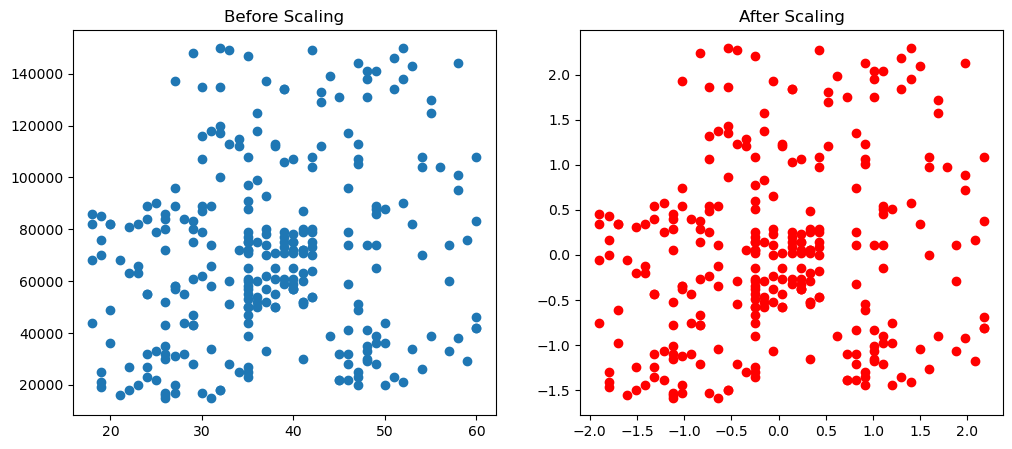

In [324]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

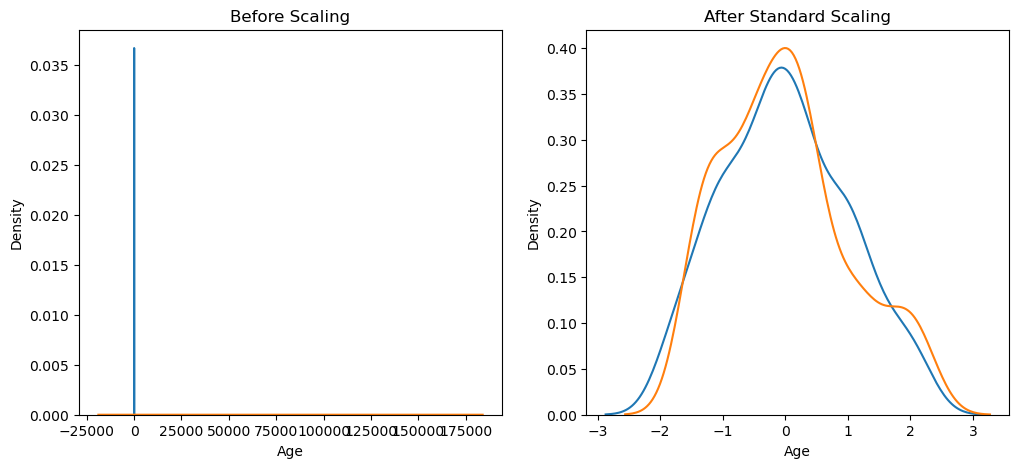

In [325]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

<Axes: title={'center': 'after Scaling'}, xlabel='Age', ylabel='Density'>

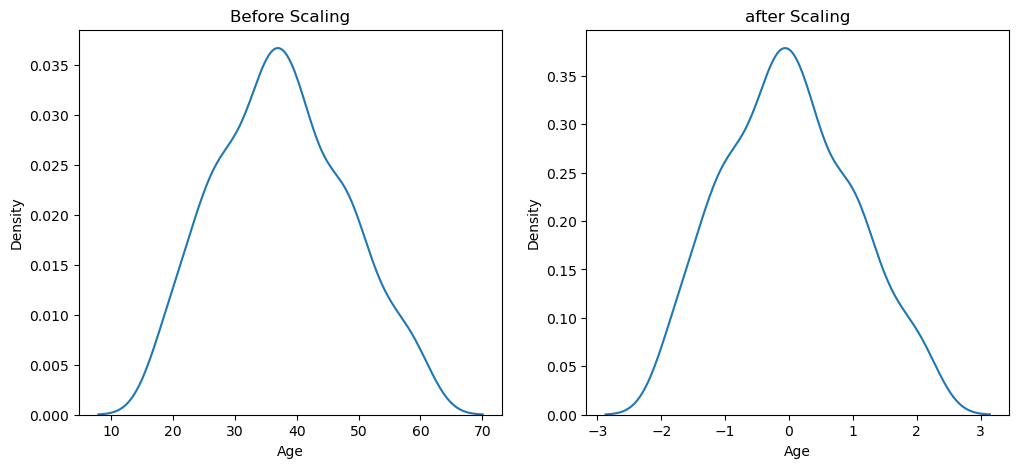

In [326]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title("after Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

<Axes: title={'center': 'after Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

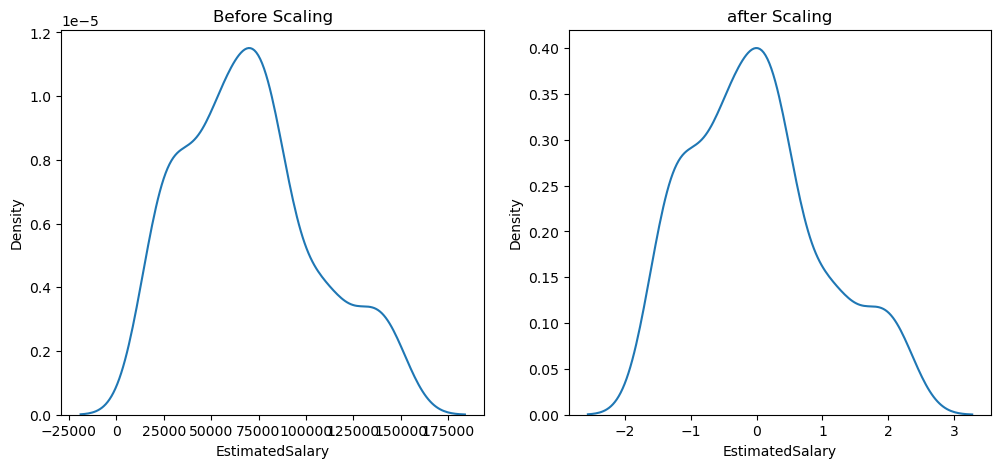

In [327]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title("after Scaling")
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

## Understanding the impact of Standardizing using a Logistic Regression model 

In [329]:
from sklearn.linear_model import LogisticRegression

In [331]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [332]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [333]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [334]:
from sklearn.metrics import accuracy_score

In [335]:
print("Actual data: ", accuracy_score(y_test, y_pred))
print("Scaled data: ", accuracy_score(y_test, y_pred_scaled))

Actual data:  0.875
Scaled data:  0.875
